# Proyek Analisis Data (Bike Sharing Dataset)

## Pertanyaan Bisnis

1. Bagaimana jumlah pengguna sewa sepeda berdasarkan jam pada hari kerja?
2. Apakah terdapat kenaikan pengguna sewa sepeda pada tahun 2012 dibandingkan dengan tahun 2011?

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Data Day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Data Hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi pada day_df, data pada masing-masing kolom memiliki jumlah yang sama. Hal ini menunjukan bahwa tidak adanya missing values pada day_df. Akan tetapi, terdapat kesalahan tipe data pada kolom dteday. Tipe data pada kolom dteday adalah objek, sehingga tipe data tersebut perlu diganti menjadi datetime.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah dilakukan pemeriksaan, pada day_df tidak ada duplikasi data.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan pemeriksaan pada parameter statistik yang terdapat pada day_df, tidak ada keanehan pada nilai statistiknya.

#### Menilai Data Hour

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi pada hour_df, data pada masing-masing kolom memiliki jumlah yang sama. Hal ini menunjukan bahwa tidak adanya missing values pada hour_df. Akan tetapi, terdapat kesalahan tipe data pada kolom dteday. Tipe data pada kolom dteday adalah objek, sehingga tipe data tersebut perlu diganti menjadi datetime.

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah dilakukan pemeriksaan, pada hour_df tidak ada duplikasi data.

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah dilakukan pemeriksaan pada parameter statistik yang terdapat pada hour_df, tidak ada keanehan pada nilai statistiknya.

### Cleaning Data

#### Mengubah Tipe Data Kolom dteday

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [11]:
print('Tipe data kolom dteday pada day_df : ', day_df["dteday"].dtypes)
print('Tipe data kolom dteday pada hour_df : ', hour_df["dteday"].dtypes)

Tipe data kolom dteday pada day_df :  datetime64[ns]
Tipe data kolom dteday pada hour_df :  datetime64[ns]


#### Melakukan Filter Data Pada hour_df

In [12]:
hour_df = hour_df[hour_df.workingday == 1]

Hanya menggunakan data pada hour_df dengan nilai pada workingday adalah 1. Karena pada pertanyaan bisnis hanya ingin mengetahui jumlah pengguna sewa sepeda pada hari kerja.

## Exploratory Data Analysis

### Ekprorasi Data Pengguna Sewa Sepeda Berdasarkan Jam Pada Hari Kerja

In [13]:
hour_df.groupby(by=["hr"]).agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   36.786290   18246
1   114   1   16.552632    8177
2    74   1    8.683778    4229
3    36   1    4.942553    2323
4    17   1    5.429787    2552
5    66   1   24.913131   12332
6   213   7  102.500000   50840
7   596  18  290.612903  144144
8   839  31  477.006048  236595
9   426  23  241.518145  119793
10  275   8  135.366935   67142
11  361  10  158.229839   78482
12  471   3  200.820926   99808
13  428  11  198.429719   98818
14  651  12  183.572289   91419
15  601  13  201.331325  100263
16  634  13  293.122244  146268
17  976  26  525.290581  262120
18  977  26  492.226908  245129
19  743  18  348.401606  173504
20  567  23  249.718876  124360
21  398   6  186.287149   92771
22  321  11  138.389558   68918
23  256   9   88.708835   44177

Berdasarkan hasil di atas, dapat dilihat bahwa terjadi kenaikan pengguna pada jam 7 sampai 8 pagi dan jam 5 sampai jam 6 sore.

### Ekprorasi Data Pengguna Sewa Sepeda Berdasarkan Bulan dan Tahun

In [14]:
day_df.groupby(by=["mnth", "yr"]).agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
          max   min         mean     sum
mnth yr                                 
1    0   1985   431  1231.903226   38189
     1   4521  1301  3120.774194   96744
2    0   2927  1005  1721.964286   48215
     1   5062  1529  3556.448276  103137
3    0   3239   605  2065.967742   64045
     1   8362  3194  5318.548387  164875
4    0   5312   795  3162.333333   94870
     1   7460  1027  5807.466667  174224
5    0   5805  2633  4381.322581  135821
     1   8294  2843  6318.225806  195865
6    0   5515  3767  4783.733333  143512
     1   8120  4127  6761.000000  202830
7    0   6043  3285  4559.387097  141341
     1   8173  4459  6567.967742  203607
8    0   5895  1115  4409.387097  136691
     1   7865  4549  6919.451613  214503
9    0   5423  1842  4247.266667  127418
     1   8714  4073  7285.766667  218573
10   0   5511   627  3984.225806  123511
     1   8156    22  6414.225806  198841
11   0   4486  1495  3405.566667  102167
     1   6852  2277  5088.800000  152664
12   0   3940   705  2816.870968   87323
     1   6606   441  3990.741935  123713

Berdasarkan hasil di atas, dapat dilihat bahwa terjadi kenaikan pengguna di setiap bulan pada tahun 2012 (diwakili dengan angka 1) dibandingkan dengan tahun 2011 (diwakili dengan angka 0).

## Data Visualization

### Visualisai Data Pengguna Sewa Sepeda Berdasarkan Jam

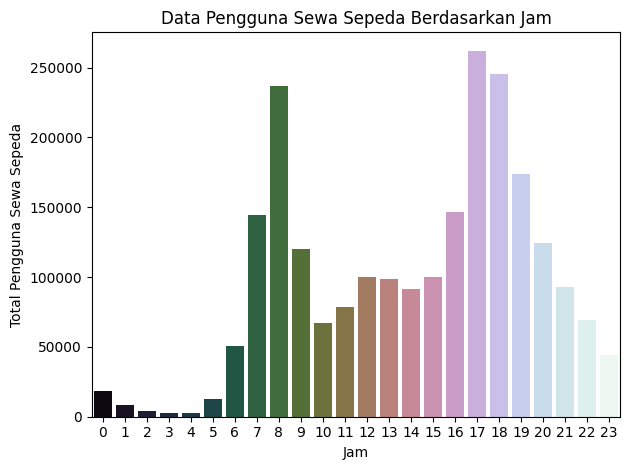

In [15]:
hourly_counts = hour_df.groupby(by=['hr']).agg({
    'cnt': 'sum'
}).reset_index()

sns.barplot(
    data=hourly_counts,
    x='hr',
    y='cnt',
    palette='cubehelix'
)

plt.title('Data Pengguna Sewa Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Pengguna Sewa Sepeda')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa terjadi kenaikan pengguna pada jam 7 sampai 8 pagi dan jam 5 sampai jam 6 sore. Jumlah pengguna akan mulai menurun secara perlahan hingga larut malam. Hal ini menunjukan pengguna sewa sepeda lebih banyak ketika jam berangkat dan pulang bekerja.

### Visualisai Data Pengguna Sewa Sepeda Berdasarkan Bulan dan Tahun

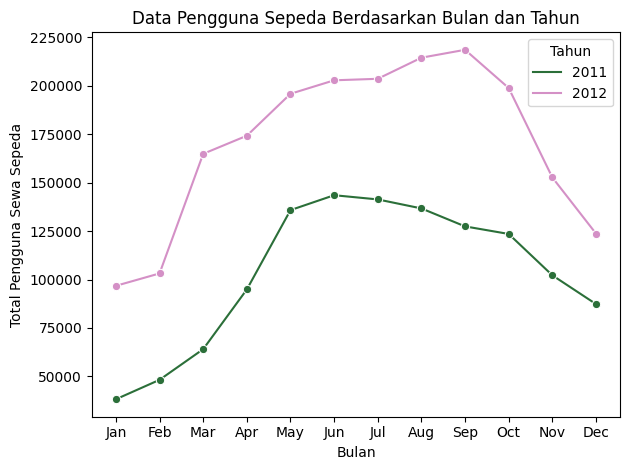

In [16]:
monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

year = {0: '2011', 1: '2012'}
mount = {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

sns.lineplot(
    data=monthly_counts.assign(yr=monthly_counts['yr'].map(year), mnth=monthly_counts['mnth'].map(mount)),
    x="mnth",
    y="cnt",
    hue="yr",
    palette="cubehelix",
    marker="o"
)

plt.title("Data Pengguna Sepeda Berdasarkan Bulan dan Tahun")
plt.xlabel("Bulan")
plt.ylabel("Total Pengguna Sewa Sepeda")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah pengguna sewa sepeda pada tahun 2012 lebih banyak di setiap bulannya dibandingkan pada tahun 2011. Pada tahun 2011 pengguna terbanyak terjadi di bulan Juni. Sedangkan pada tahun 2012 pengguna terbanyak terjadi di bulan September.

## Kesimpulan

### 1. Bagaimana jumlah pengguna sewa sepeda berdasarkan jam pada hari kerja?

Terdapat peningkatan jumlah pengguna pada jam 7 sampai 8 pagi dan jam 5 sampai jam 6 sore. Hal ini menunjukan pengguna sewa sepeda lebih banyak ketika jam berangkat dan pulang bekerja.

### 2. Apakah terdapat kenaikan pengguna sewa sepeda pada tahun 2012 dibandingkan dengan tahun 2011?

Terdapat peningkatan jumlah pengguna sewa sepeda pada tahun 2012 di setiap bulannya dibandingkan pada tahun 2011.